# Unsupervised learning on the Iris flower data

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

In this lab, we are going to do some unsupervised learning, pretending that we do not know the class and we will try to find it. Are we able to find the 3 populations of flowers just by looking at the data ?

![Image of Iris_setosa](http://www.twofrog.com/images/iris38a.jpg)

# Read the data with Pandas

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Explore the data: plot distribution and joint distribution

In [3]:
df.shape

(150, 5)

In [4]:
df.groupby('class').nunique()

,sepal_len,sepal_wid,petal_len,petal_wid,class
class,,,,,
Iris-setosa,15,16,9,6,1
Iris-versicolor,21,14,19,9,1
Iris-virginica,21,13,20,12,1


In [5]:
num_features = len(df.columns) - 1
X = df.iloc[:,:num_features].values
y = df.iloc[:,num_features].values

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


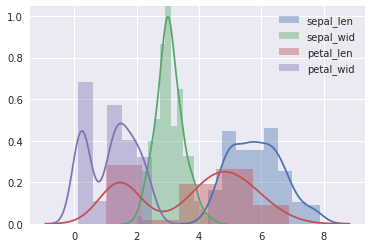

In [6]:
for i in range(num_features):
    sns.distplot(X[:,i], kde=True, label=df.columns[i])
plt.legend()

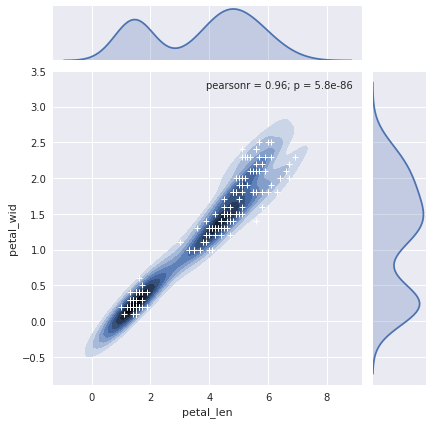

In [36]:
g = sns.jointplot(x="petal_len", y="petal_wid", data=df, kind="kde")
g.plot_joint(plt.scatter, c="w", s=40, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


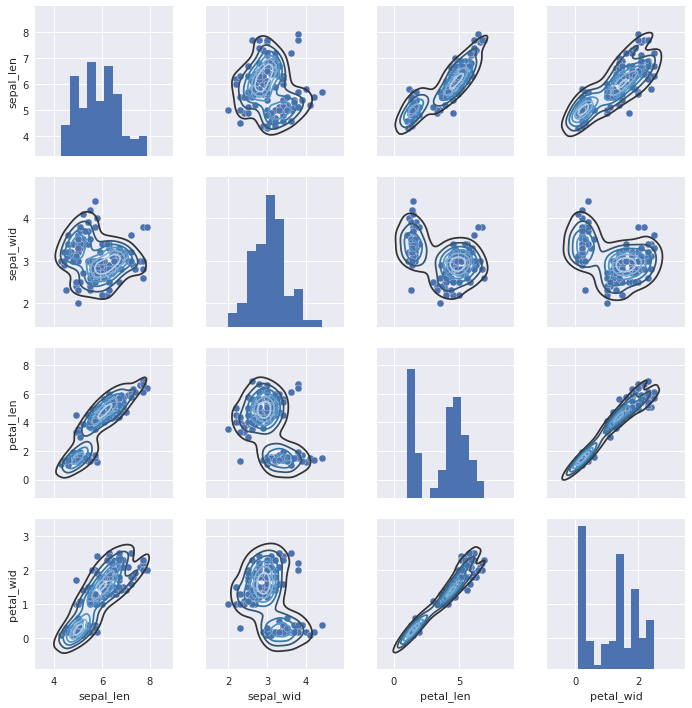

In [7]:
# One line to plot all the pairs
g = sns.pairplot(df)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

## Plot with the different classes

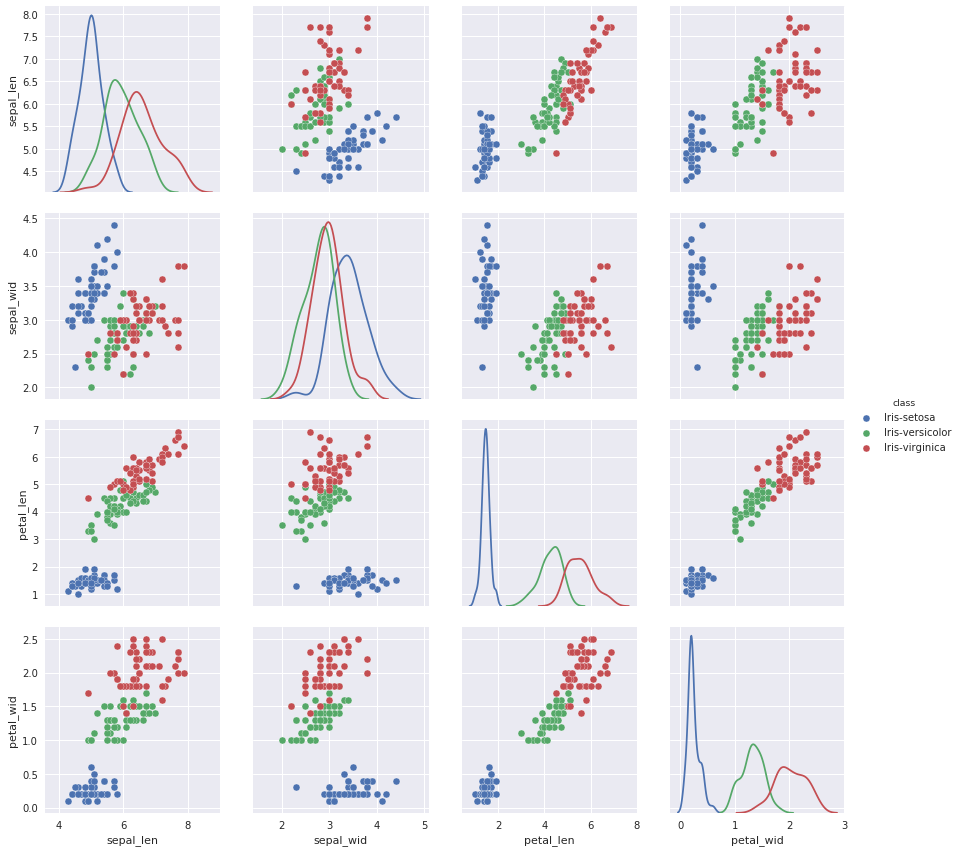

In [8]:
sns.pairplot(df, hue="class", diag_kind="kde", size=3);

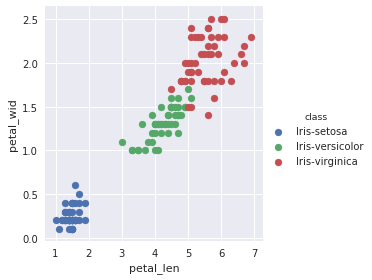

In [9]:
# If we want just one plot...
sns.FacetGrid(df, hue="class", size=4) \
   .map(plt.scatter, "petal_len", "petal_wid") \
   .add_legend();

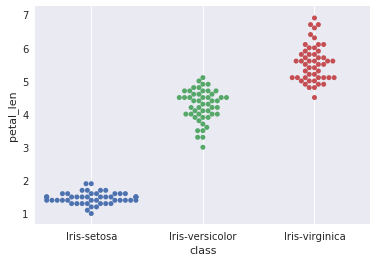

In [10]:
# Another cool plot to visualize the different distributions
sns.swarmplot(x="class", y="petal_len", data=df)
plt.grid()

# Preparing the data

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaled_array = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = df.columns[:-1])
X_scaled.sample(5)

,sepal_len,sepal_wid,petal_len,petal_wid
95,-0.173674,-0.124958,0.250967,0.001753
49,-1.021849,0.569251,-1.341272,-1.312977
105,2.128516,-0.124958,1.615744,1.185010
114,-0.052506,-0.587764,0.762759,1.579429
22,-1.506521,1.263460,-1.568735,-1.312977


# K-Means clustering

This is the simplest clustering algorithm. Before trying anything else, we have to try it. 

First we try clustering on the 4d data and see if can reproduce the actual clusters.

ie imagine we don't have the species labels on this data and wanted to divide the flowers into species. could set an arbitrary number of clusters and try dividing them up into similar clusters.

Since we happen to know there are 3 species, so let's find 3 species and see if the predictions for each point matches the label in y.

In [12]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters, random_state=42)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:
df['cluster'] = y_cluster_kmeans

In [14]:
len(df.loc[df['cluster'] == 2].loc[df['class']=='Iris-virginica'])

14

# PCA: principal component analysis

so that was clustering on the orginal 4d data.

if you have a lot of features it can be helpful to do some feature reduction to avoid the curse of dimensionality (i.e. needing exponentially more data to do accurate predictions as the number of features grows).

you can do this with Principal Component Analysis (PCA), which remaps the data to a new (smaller) coordinate system which tries to account for the most information possible.

you can *also* use PCA to visualize the data by reducing the features to 2 dimensions and making a scatterplot.  it kind of mashes the data down into 2d, so can lose  information - but in this case it's just going from 4d to 2d, so not losing too much info. 

so let's just use it to visualize the data...

In [16]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=43)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
43,-1.964279,0.497392
112,1.884252,0.414333
117,2.437378,2.556757
128,1.786009,-0.193273
22,-2.774170,0.489517


so that gives us new 2d coordinates for each data point.

At this point, if you don't have labelled data, you can add the k-means cluster ids to this table and make a colored scatterplot. 

we do actually have labels for the data points, but let's imagine we don't, and use the predicted labels to see what the predictions look like.

first, convert species to an arbitrary number

In [17]:
y_id_array = pd.Categorical(df['class']).codes

df_plot = X_pca.copy()
df_plot['cluster'] = y_cluster_kmeans
df_plot['classId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,cluster,classId
17,-2.190179,0.514304,1,0
35,-2.211120,-0.184338,1,0
76,1.254222,-0.082620,0,1
61,0.438730,-0.058881,2,1
53,0.397307,-1.758169,2,1


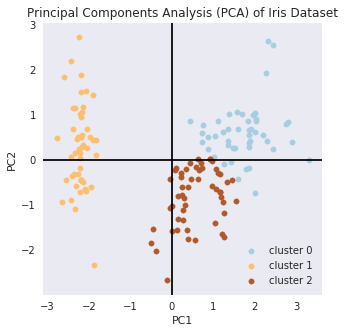

In [19]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    """make a scatterplot of the first two principal components of the data, colored by the groupby field"""
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (5,5))

    # color map
    cmap = mpl.cm.get_cmap('Paired')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'cluster')

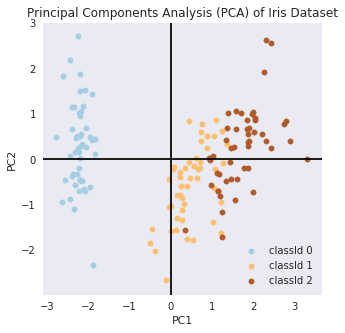

In [20]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'classId')

So the k-means clustering *did not* find the correct clusterings!

**question: so what do these dimensions mean? **

They're the principal components, which pick out the directions of maximal variation in the original data. PC1 finds the most variation, PC2 the second-most. The rest of the data is basically thrown away when the data is reduced down to 2d.

**question: if these principal components represent some latent (hidden) features, what would those be? **

maybe size (area) of the petals and sepals? 

# Gaussian Mixture Models

In [21]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters, 
# and might be the case when measuring things like petal and sepal sizes...

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

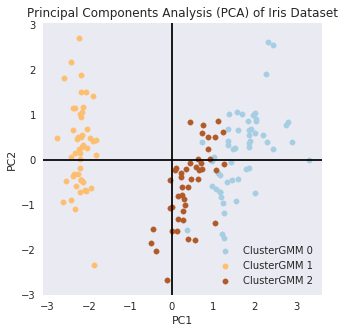

In [22]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

# Comparison of k-mean vs. gmm

**Question" how much better did the GMM do versus the K-means clustering? ie quantify it...***

you can't just compare the classId with the cluster numbers, because they are both arbitrarily assigned integers.

But you can ualso se the *adjusted Rand score* to quantify the goodness of the clustering, as compared with classId (the true labels).

e.g. this will give a perfect score of 1.0, even though the labels are reversed -  
adjusted_rand_score([0,0,1,1], [1,1,0,0]) # => 1.0

see http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

In [24]:
# now the GMM clustering - 
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124

# Conclusion

**Principal Component Analysis (PCA)** is useful for visualizing high-dimensional datasets, as it can compress it down to 2 dimensions. It's also useful for reducing the dimensionality of high-dimensional datasets, which require exponentially more data as the number of dimensions increase, but we didn't need to do that in this case because the dataset was rather small.

**k-Means Clustering** is biased towards spherical distributions of clusters, and makes hard assignments to clusters, but is very fast (linear in number of features and data points).

**Gaussian Mixture Model (GMM)** Clustering handles ellipsoidal distributions, and makes 'soft' assignments to clusters, but is much slower than k-means for large datasets.

For this dataset, which was measuring what were probably normally distributed features, the GMM clustering worked better at finding the actual species labels, as measured by the adjusted Rand score.